In [32]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
import spectral.io.envi as envi
import spectral

import matplotlib.pyplot as plt
import numpy as np

In [34]:
file = r"E:\Breast_Cancer_US_dataset\br1003-br2085b\br1003-br2085b"
header = r"E:\Breast_Cancer_US_dataset\br1003-br2085b\br1003-br2085b.hdr"

img = envi.open(header, file)

In [4]:
import sys

In [5]:
sys.executable

'C:\\Users\\Conor\\Anaconda3\\python.exe'

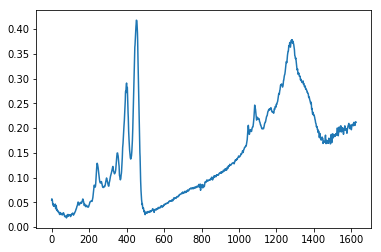

In [24]:
%timeit

plt.plot(img.read_pixel(2100,230))

In [36]:
wavenumbers = {i: int(float(wn)) for i, wn in enumerate(img.metadata["wavelength"])}

In [37]:
wavenumbers

{0: 750,
 1: 752,
 2: 754,
 3: 756,
 4: 758,
 5: 760,
 6: 762,
 7: 764,
 8: 766,
 9: 768,
 10: 770,
 11: 772,
 12: 774,
 13: 776,
 14: 778,
 15: 780,
 16: 782,
 17: 784,
 18: 786,
 19: 788,
 20: 790,
 21: 792,
 22: 794,
 23: 796,
 24: 798,
 25: 800,
 26: 802,
 27: 804,
 28: 806,
 29: 808,
 30: 810,
 31: 812,
 32: 814,
 33: 816,
 34: 818,
 35: 820,
 36: 822,
 37: 824,
 38: 826,
 39: 828,
 40: 830,
 41: 832,
 42: 834,
 43: 836,
 44: 838,
 45: 840,
 46: 842,
 47: 844,
 48: 846,
 49: 848,
 50: 850,
 51: 852,
 52: 854,
 53: 856,
 54: 858,
 55: 860,
 56: 862,
 57: 864,
 58: 866,
 59: 868,
 60: 870,
 61: 872,
 62: 874,
 63: 876,
 64: 878,
 65: 880,
 66: 882,
 67: 884,
 68: 886,
 69: 888,
 70: 890,
 71: 892,
 72: 894,
 73: 896,
 74: 898,
 75: 900,
 76: 902,
 77: 904,
 78: 906,
 79: 908,
 80: 910,
 81: 912,
 82: 914,
 83: 916,
 84: 918,
 85: 920,
 86: 922,
 87: 924,
 88: 926,
 89: 928,
 90: 930,
 91: 932,
 92: 934,
 93: 936,
 94: 938,
 95: 940,
 96: 942,
 97: 944,
 98: 946,
 99: 948,
 100: 950,

In [38]:
amide_1 = img.read_band(450)[:,:3200]

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


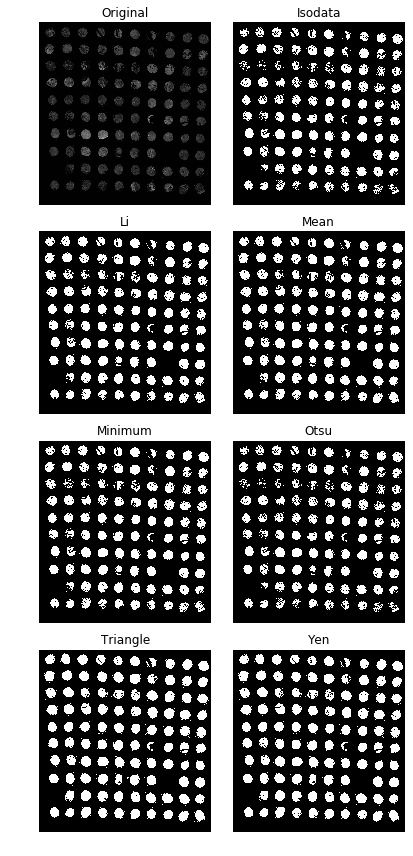

In [39]:
from skimage.filters import try_all_threshold

# Here, we specify a radius for local thresholding algorithms.
# If it is not specified, only global algorithms are called.
fig, ax = try_all_threshold(amide_1, figsize=(6, 12), verbose=True)
plt.show()

(array([8.874624e+06, 9.282610e+05, 7.880890e+05, 2.313740e+05,
        4.983600e+04, 5.978000e+03, 1.422000e+03, 3.110000e+02,
        9.400000e+01, 1.100000e+01]),
 array([-0.01466036,  0.1976157 ,  0.40989175,  0.6221678 ,  0.83444387,
         1.0467199 ,  1.258996  ,  1.471272  ,  1.6835481 ,  1.8958241 ,
         2.1081002 ], dtype=float32),
 <a list of 10 Patch objects>)

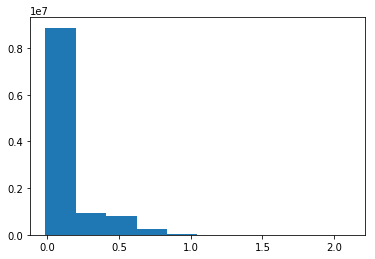

In [41]:
plt.hist(amide_1.flatten())

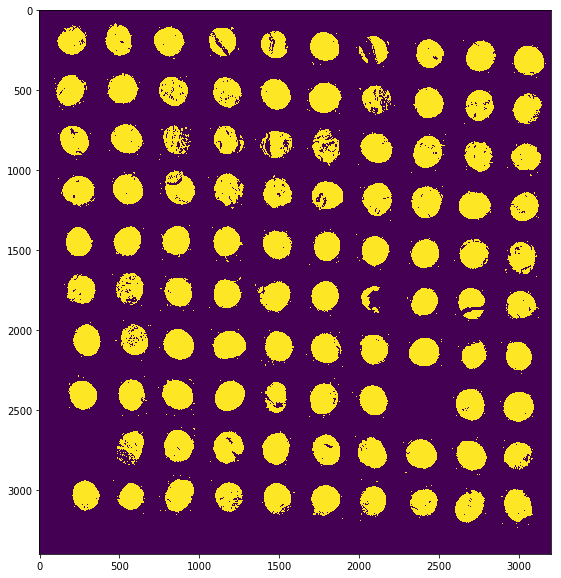

In [48]:
fig,ax = plt.subplots(figsize = (10,10))

ax.imshow(amide_1 > 0.05)

# Import label assignments from excel

In [49]:
import pandas as pd

In [78]:
specs = pd.read_excel(r"C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\BR1003 specs.xlsx").iloc[9:,:]

specs.columns = specs.loc[9]
specs.drop(9, axis = 0, inplace = True)

In [79]:
specs.head()

9,Position,No.,Age,Sex,Organ/Anatomic Site,Pathology diagnosis,TNM,Grade,Stage,Type,Tissue ID.,Region Label
10,A1,1,59,F,Breast,Adenosis with mild hyperplasia of ductal epith...,NaN,-,NaN,hyperplasia,Fmg020022,2
11,A2,2,59,F,Breast,Adenosis with mild hyperplasia of ductal epith...,NaN,-,NaN,hyperplasia,Fmg020022,1
12,A3,3,42,F,Breast,Hyperplasia (fibrofatty tissue),NaN,-,NaN,hyperplasia,Fmg010188,10
13,A4,4,42,F,Breast,Adenosis with moderate hyperplasia of ductal a...,NaN,-,NaN,hyperplasia,Fmg010188,26
14,A5,5,62,F,Breast,Adenosis with mild hyperplasia of ductal and l...,NaN,-,NaN,hyperplasia,Fmg010027,143


In [80]:
region_dict = dict(zip(specs["Region Label"], specs["Position"]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


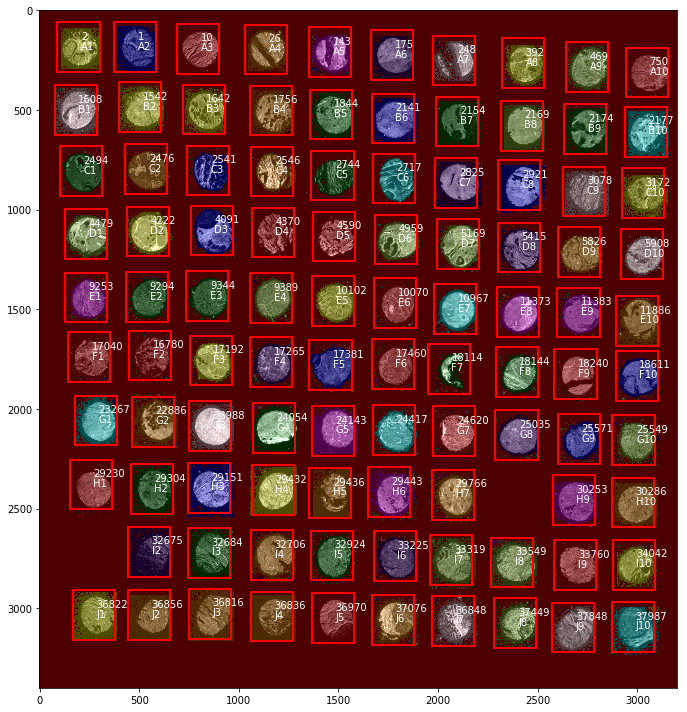

In [85]:
from skimage.filters import threshold_otsu\
, threshold_triangle, threshold_mean\
, sobel, threshold_li, threshold_minimum\
, threshold_isodata, threshold_adaptive

from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
import matplotlib.patches as mpatches

image = amide_1

# apply threshold
#thresh = threshold_isodata(amide_1>0.01)
#bw = closing(image > thresh, square(7))

#block_size = 2801
#bw = threshold_adaptive(amide_1, block_size, offset = 0)
#bw = closing(bw, square(3))

# remove artifacts connected to image border

#cleared = clear_border(bw)
cleared = clear_border(amide_1 > 0.001)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)


fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image_label_overlay)

# Find the biggest region to use the bbox as a mask
regions = regionprops(label_image)
regions.sort(key = lambda region: region.area, reverse = True)
biggest = regions[0]

# Factor to increase crop area around TMA core
f_ = 1

for region in regions:
    
    # take regions with large enough areas which are roughly circular
    if region.area >= 5000:
        #if ((region.bbox[0] - region.bbox[1])/(region.bbox[2] - region.bbox[3])) > 1.5:
        # draw rectangle around segmented coins
        
        try:
            minr, minc, maxr, maxc = biggest.bbox
            
            top_left = (region.centroid[1]-((f_)*(maxc-minc)/2),
                        region.centroid[0]-((f_)*(maxr-minr)/2))
            
            vert_side, horiz_side = f_*(maxc-minc), f_*(maxr-minr)
            vert_side, horiz_side = 211, 249
            
            rect = mpatches.Rectangle(top_left, vert_side, horiz_side,
                                      fill=False, edgecolor='red', linewidth=2)
            ax.add_patch(rect)
            ax.text(region.centroid[1], region.centroid[0]-50, region.label, color = "w")
            ax.text(region.centroid[1], region.centroid[0], region_dict[region.label], color = "w")
            
        except: pass 

plt.tight_layout()
plt.show()

# Create spec files and save label images

In [86]:
import imageio
import matplotlib

In [87]:
tissue_colours = dict(zip(plt.cm.tab10.colors, ["blood", "coll", "epith", "fibro", "lymph", "myo", "necrosis"]))

In [ ]:
for name in tissue_colours.values():

    labels = imageio.imread(r"E:\Breast_Cancer_US_dataset\brc961-br1001\supervised-class\class_{}.png".format(name))

    imageio.imsave(r"C:\Users\Conor\Documents\Breast_Tissue_Labels\BRC961\masks\BR961_{}_labels.png".format(name), labels[:,:4150])

In [ ]:
mask= imageio.imread(r"E:\Breast_Cancer_US_dataset\brc961-br1001\supervised-class\tissue_mask.png")

plt.imshow(mask[:,4150:])

In [13]:
import scipy
from skimage.color import gray2rgb

In [ ]:
region_dict.to_csv("C:\Users\Conor\Documents\Breast_Tissue_Labels\2085-b\datacubes")

In [18]:
import os

In [90]:
regions = {image.label: image for image in regionprops(label_image) if image.area > 5000}

In [98]:
from tqdm import tqdm

TMA = "1003"
offset = 0

f = 1.15

# Find the biggest region to use the bbox as a mask
regions = regionprops(label_image)
regions.sort(key = lambda region: region.area, reverse = True)
biggest = regions[0]

masks = {name: imageio.imread(r"C:\Users\Conor\Documents\Breast_Tissue_Labels\{}\masks\{}_{}_labels.png".format(TMA,TMA,name)) for name in tissue_colours.values()}

for i, region in enumerate(tqdm([image for image in regionprops(label_image) if image.area >= 5000])):
    
    # Skip any regions not in the metadata
    try: region_dict[region.label]
    except: continue
        
    #if region_dict[region.label][0] not in ["H","I","J","K","L","M"]: continue
    
    print(region.label)
        
    #if i not in [14]: continue
    
    bbox = region.bbox # Get bounding box of the segmented image
    
    minr, minc, maxr, maxc = biggest.bbox # BBOX of largest segment
    
    # Get coordinates of region using biggest bounding box
    t = int(np.floor((region.centroid[0] - (maxr-minr)*f/2)))
    b = int(np.floor((region.centroid[0] + (maxr-minr)*f/2)))
    
    l = int(np.floor((region.centroid[1] - (maxc-minc)*f/2)))
    r = int(np.floor((region.centroid[1] + (maxc-minc)*f/2)))
    
    if l-r == -273: r = r - 1
    if b-t == 309: b = b - 1
    
    print(r-l, b-t)
    
    datacube = img.read_subregion([t, b], [offset+l, offset+r]) # Get the cropped datacube
    temp_im = gray2rgb(datacube.mean(axis = 2))

    # Create empty image for label
    label_img = np.zeros((temp_im.shape[0], temp_im.shape[1], 3), dtype = np.uint8)
    
    # Look up the region label reference to get core ID
    core = region_dict[region.label]

    envi.save_image(r"C:\Users\Conor\Documents\Breast_Tissue_Labels\{}\datacubes\{}.HDR".format(TMA, core)
                , datacube
                , metadata = {"Name": core, "Wavelengths": img.metadata["wavelength"]}
                , force = True)

    # Label image using the appropriate tissue type.
    for colour, name in tissue_colours.items():
        
        labels = masks[name]
        cropped_labels = labels[t:b, l:r]
        
        # Apply mask to blank image to get colour
        temp_im[cropped_labels > 1] = np.array(colour)
        
        #scipy.misc.imsave(r"C:\Users\Conor\Documents\Breast_Tissue_Labels\{}\{}.jpg".format(name, region.label), label_img)
        
    imageio.imsave(r"C:\Users\Conor\Documents\Breast_Tissue_Labels\{}\labelled_cores\{}.png".format(TMA, region_dict[region.label]), temp_im)




  0%|                                                                                           | 0/98 [00:00<?, ?it/s]

1
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\A2.img


Lossy conversion from float32 to uint8. Range [-0.0008974242955446243, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



  1%|▊                                                                                  | 1/98 [00:07<12:04,  7.47s/it]

2
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\A1.img


Lossy conversion from float32 to uint8. Range [-0.0007508385460823774, 0.8392156958580017]. Convert image to uint8 prior to saving to suppress this warning.



  2%|█▋                                                                                 | 2/98 [00:14<11:48,  7.38s/it]

10
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\A3.img


Lossy conversion from float32 to uint8. Range [-0.0015811938792467117, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



  3%|██▌                                                                                | 3/98 [00:22<11:43,  7.40s/it]

26
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\A4.img


Lossy conversion from float32 to uint8. Range [-0.0028511665295809507, 0.6564139723777771]. Convert image to uint8 prior to saving to suppress this warning.



  4%|███▎                                                                             | 4/98 [03:03<1:23:50, 53.51s/it]

143
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\A5.img


Lossy conversion from float32 to uint8. Range [-0.002714430680498481, 0.5606191158294678]. Convert image to uint8 prior to saving to suppress this warning.



  5%|████▏                                                                            | 5/98 [05:42<2:12:01, 85.18s/it]

175
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\A6.img


Lossy conversion from float32 to uint8. Range [-0.0020714669954031706, 0.6170806288719177]. Convert image to uint8 prior to saving to suppress this warning.



  6%|████▉                                                                           | 6/98 [08:22<2:45:01, 107.63s/it]

248
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\A7.img


Lossy conversion from float32 to uint8. Range [-0.003195151686668396, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



  7%|█████▋                                                                          | 7/98 [11:10<3:10:43, 125.75s/it]

392
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\A8.img


Lossy conversion from float32 to uint8. Range [-0.0032081028912216425, 0.8392156958580017]. Convert image to uint8 prior to saving to suppress this warning.



  8%|██████▌                                                                         | 8/98 [13:50<3:23:58, 135.99s/it]

469
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\A9.img


Lossy conversion from float32 to uint8. Range [-0.002778436755761504, 0.8392156958580017]. Convert image to uint8 prior to saving to suppress this warning.



  9%|███████▎                                                                        | 9/98 [16:30<3:32:43, 143.41s/it]

750
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\A10.img


Lossy conversion from float32 to uint8. Range [-0.005235287360846996, 0.8392156958580017]. Convert image to uint8 prior to saving to suppress this warning.



 10%|████████                                                                       | 10/98 [19:11<3:38:05, 148.69s/it]

1542
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\B2.img


Lossy conversion from float32 to uint8. Range [-0.0010062059154734015, 0.6274510025978088]. Convert image to uint8 prior to saving to suppress this warning.



 11%|████████▊                                                                      | 11/98 [21:47<3:38:34, 150.74s/it]

1608
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\B1.img


Lossy conversion from float32 to uint8. Range [-0.001282080658711493, 0.6680923700332642]. Convert image to uint8 prior to saving to suppress this warning.



 12%|█████████▋                                                                     | 12/98 [24:28<3:40:19, 153.72s/it]

1642
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\B3.img


Lossy conversion from float32 to uint8. Range [-0.0009725187555886805, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



 13%|██████████▍                                                                    | 13/98 [26:51<3:33:28, 150.69s/it]

1756
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\B4.img


Lossy conversion from float32 to uint8. Range [-0.0009492280660197139, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



 14%|███████████▎                                                                   | 14/98 [29:08<3:25:03, 146.47s/it]

1844
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\B5.img


Lossy conversion from float32 to uint8. Range [-0.001053730957210064, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



 15%|████████████                                                                   | 15/98 [31:25<3:18:49, 143.73s/it]

2141
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\B6.img


Lossy conversion from float32 to uint8. Range [-0.00096136360662058, 0.7058823704719543]. Convert image to uint8 prior to saving to suppress this warning.



 16%|████████████▉                                                                  | 16/98 [33:43<3:13:51, 141.85s/it]

2154
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\B7.img


Lossy conversion from float32 to uint8. Range [-0.0006940313032828271, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



 17%|█████████████▋                                                                 | 17/98 [35:53<3:06:53, 138.44s/it]

2169
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\B8.img


Lossy conversion from float32 to uint8. Range [-0.0009311935282312334, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



 18%|██████████████▌                                                                | 18/98 [38:14<3:05:39, 139.25s/it]

2174
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\B9.img


Lossy conversion from float32 to uint8. Range [-0.0010905568487942219, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



 19%|███████████████▎                                                               | 19/98 [40:44<3:07:17, 142.25s/it]

2177
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\B10.img


Lossy conversion from float32 to uint8. Range [-6.275350187934237e-06, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



 20%|████████████████                                                               | 20/98 [43:19<3:10:02, 146.19s/it]

2476
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\C2.img


Lossy conversion from float32 to uint8. Range [-0.00452613178640604, 0.8901960849761963]. Convert image to uint8 prior to saving to suppress this warning.



 21%|████████████████▉                                                              | 21/98 [46:00<3:13:20, 150.66s/it]

2494
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\C1.img


Lossy conversion from float32 to uint8. Range [-0.004458446055650711, 0.7058823704719543]. Convert image to uint8 prior to saving to suppress this warning.



 22%|█████████████████▋                                                             | 22/98 [48:40<3:14:24, 153.48s/it]

2541
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\C3.img


Lossy conversion from float32 to uint8. Range [-0.00392920384183526, 0.6776320338249207]. Convert image to uint8 prior to saving to suppress this warning.



 23%|██████████████████▌                                                            | 23/98 [50:59<3:06:32, 149.23s/it]

2546
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\C4.img


Lossy conversion from float32 to uint8. Range [-0.004181293770670891, 0.8079996705055237]. Convert image to uint8 prior to saving to suppress this warning.



 24%|███████████████████▎                                                           | 24/98 [53:15<2:58:55, 145.08s/it]

2717
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\C6.img


Lossy conversion from float32 to uint8. Range [-0.009211281314492226, 0.6310674548149109]. Convert image to uint8 prior to saving to suppress this warning.



 26%|████████████████████▏                                                          | 25/98 [55:36<2:55:04, 143.90s/it]

2744
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\C5.img


Lossy conversion from float32 to uint8. Range [-0.00547944288700819, 0.7058823704719543]. Convert image to uint8 prior to saving to suppress this warning.



 27%|████████████████████▉                                                          | 26/98 [56:06<2:11:31, 109.61s/it]

2825
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\C7.img


Lossy conversion from float32 to uint8. Range [-0.0012163608334958553, 0.8551602959632874]. Convert image to uint8 prior to saving to suppress this warning.



 28%|█████████████████████▊                                                         | 27/98 [58:23<2:19:29, 117.88s/it]

2921
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\C8.img


Lossy conversion from float32 to uint8. Range [-0.003119731554761529, 0.7795779705047607]. Convert image to uint8 prior to saving to suppress this warning.



 29%|██████████████████████                                                       | 28/98 [1:00:45<2:26:10, 125.29s/it]

3078
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\C9.img


Lossy conversion from float32 to uint8. Range [-0.0005882964469492435, 0.8392156958580017]. Convert image to uint8 prior to saving to suppress this warning.



 30%|██████████████████████▊                                                      | 29/98 [1:03:22<2:34:54, 134.70s/it]

3172
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\C10.img


Lossy conversion from float32 to uint8. Range [-0.0006569900433532894, 0.8392156958580017]. Convert image to uint8 prior to saving to suppress this warning.



 31%|███████████████████████▌                                                     | 30/98 [1:06:02<2:41:25, 142.43s/it]

4091
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\D3.img


Lossy conversion from float32 to uint8. Range [-0.00388693786226213, 0.8392156958580017]. Convert image to uint8 prior to saving to suppress this warning.



 32%|████████████████████████▎                                                    | 31/98 [1:08:41<2:44:20, 147.18s/it]

4222
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\D2.img


Lossy conversion from float32 to uint8. Range [-0.0037251280155032873, 0.8901960849761963]. Convert image to uint8 prior to saving to suppress this warning.



 33%|█████████████████████████▏                                                   | 32/98 [1:11:18<2:45:19, 150.29s/it]

4370
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\D4.img


Lossy conversion from float32 to uint8. Range [-0.004248958081007004, 0.6548629999160767]. Convert image to uint8 prior to saving to suppress this warning.



 34%|█████████████████████████▉                                                   | 33/98 [1:13:31<2:37:06, 145.03s/it]

4479
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\D1.img


Lossy conversion from float32 to uint8. Range [-0.0040503088384866714, 0.8392156958580017]. Convert image to uint8 prior to saving to suppress this warning.



 35%|██████████████████████████▋                                                  | 34/98 [1:16:13<2:40:00, 150.00s/it]

4590
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\D5.img


Lossy conversion from float32 to uint8. Range [-0.004635062534362078, 0.8392156958580017]. Convert image to uint8 prior to saving to suppress this warning.



 36%|███████████████████████████▌                                                 | 35/98 [1:18:30<2:33:40, 146.36s/it]

4959
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\D6.img


Lossy conversion from float32 to uint8. Range [-0.0044643511064350605, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



 37%|████████████████████████████▎                                                | 36/98 [1:20:41<2:26:11, 141.47s/it]

5169
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\D7.img


Lossy conversion from float32 to uint8. Range [-0.0041438499465584755, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



 38%|█████████████████████████████                                                | 37/98 [1:23:05<2:24:44, 142.37s/it]

5415
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\D8.img


Lossy conversion from float32 to uint8. Range [-0.004408898297697306, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



 39%|█████████████████████████████▊                                               | 38/98 [1:25:35<2:24:33, 144.56s/it]

5826
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\D9.img


Lossy conversion from float32 to uint8. Range [-0.0039044981822371483, 0.8392156958580017]. Convert image to uint8 prior to saving to suppress this warning.



 40%|██████████████████████████████▋                                              | 39/98 [1:28:14<2:26:37, 149.11s/it]

5908
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\D10.img


Lossy conversion from float32 to uint8. Range [-0.0045536779798567295, 0.5549453496932983]. Convert image to uint8 prior to saving to suppress this warning.



 41%|███████████████████████████████▍                                             | 40/98 [1:30:54<2:27:04, 152.15s/it]

9253
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\E1.img


Lossy conversion from float32 to uint8. Range [-0.0013495930470526218, 0.5490196347236633]. Convert image to uint8 prior to saving to suppress this warning.



 42%|████████████████████████████████▏                                            | 41/98 [1:33:40<2:28:35, 156.40s/it]

9294
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\E2.img


Lossy conversion from float32 to uint8. Range [-0.0015467588091269135, 0.3593357801437378]. Convert image to uint8 prior to saving to suppress this warning.



 43%|█████████████████████████████████                                            | 42/98 [1:36:22<2:27:33, 158.09s/it]

9344
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\E3.img


Lossy conversion from float32 to uint8. Range [-0.0015028914203867316, 0.804476261138916]. Convert image to uint8 prior to saving to suppress this warning.



 44%|█████████████████████████████████▊                                           | 43/98 [1:39:04<2:25:53, 159.16s/it]

9389
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\E4.img


Lossy conversion from float32 to uint8. Range [-0.001191801973618567, 0.5895019173622131]. Convert image to uint8 prior to saving to suppress this warning.



 45%|██████████████████████████████████▌                                          | 44/98 [1:41:30<2:19:39, 155.18s/it]

10070
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\E6.img


Lossy conversion from float32 to uint8. Range [-0.0017555708764120936, 0.8901960849761963]. Convert image to uint8 prior to saving to suppress this warning.



 46%|███████████████████████████████████▎                                         | 45/98 [1:44:04<2:16:47, 154.87s/it]

10102
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\E5.img


Lossy conversion from float32 to uint8. Range [-0.0013653859496116638, 0.661566972732544]. Convert image to uint8 prior to saving to suppress this warning.



 47%|████████████████████████████████████▏                                        | 46/98 [1:44:34<1:41:53, 117.57s/it]

10967
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\E7.img


Lossy conversion from float32 to uint8. Range [-0.0014375997707247734, 0.7573285698890686]. Convert image to uint8 prior to saving to suppress this warning.



 48%|████████████████████████████████████▉                                        | 47/98 [1:47:00<1:47:05, 126.00s/it]

11373
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\E8.img


Lossy conversion from float32 to uint8. Range [-0.0014019310474395752, 0.8901960849761963]. Convert image to uint8 prior to saving to suppress this warning.



 49%|█████████████████████████████████████▋                                       | 48/98 [1:49:34<1:52:08, 134.57s/it]

11383
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\E9.img


Lossy conversion from float32 to uint8. Range [-0.0021182806231081486, 0.6274510025978088]. Convert image to uint8 prior to saving to suppress this warning.



 50%|██████████████████████████████████████▌                                      | 49/98 [1:52:08<1:54:37, 140.36s/it]

11886
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\E10.img


Lossy conversion from float32 to uint8. Range [-0.002814037259668112, 0.574995219707489]. Convert image to uint8 prior to saving to suppress this warning.



 51%|███████████████████████████████████████▎                                     | 50/98 [1:54:50<1:57:20, 146.68s/it]

16780
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\F2.img


Lossy conversion from float32 to uint8. Range [-0.0016419796738773584, 0.5678045153617859]. Convert image to uint8 prior to saving to suppress this warning.



 52%|████████████████████████████████████████                                     | 51/98 [1:57:24<1:56:38, 148.90s/it]

17040
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\F1.img


Lossy conversion from float32 to uint8. Range [-0.000998866860754788, 0.8901960849761963]. Convert image to uint8 prior to saving to suppress this warning.



 53%|████████████████████████████████████████▊                                    | 52/98 [2:00:06<1:57:13, 152.91s/it]

17192
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\F3.img


Lossy conversion from float32 to uint8. Range [-0.008221274241805077, 0.6274510025978088]. Convert image to uint8 prior to saving to suppress this warning.



 54%|█████████████████████████████████████████▋                                   | 53/98 [2:02:38<1:54:32, 152.72s/it]

17265
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\F4.img


Lossy conversion from float32 to uint8. Range [-0.002046567387878895, 0.7658323049545288]. Convert image to uint8 prior to saving to suppress this warning.



 55%|██████████████████████████████████████████▍                                  | 54/98 [2:05:00<1:49:35, 149.45s/it]

17381
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\F5.img


Lossy conversion from float32 to uint8. Range [-0.002352334326133132, 0.7411764860153198]. Convert image to uint8 prior to saving to suppress this warning.



 56%|███████████████████████████████████████████▏                                 | 55/98 [2:07:21<1:45:13, 146.83s/it]

17460
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\F6.img


Lossy conversion from float32 to uint8. Range [-0.001037744921632111, 0.7411764860153198]. Convert image to uint8 prior to saving to suppress this warning.



 57%|████████████████████████████████████████████                                 | 56/98 [2:09:40<1:41:13, 144.61s/it]

18114
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\F7.img


Lossy conversion from float32 to uint8. Range [-0.0004317775892559439, 0.7151929140090942]. Convert image to uint8 prior to saving to suppress this warning.



 58%|████████████████████████████████████████████▊                                | 57/98 [2:11:50<1:35:45, 140.13s/it]

18144
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\F8.img


Lossy conversion from float32 to uint8. Range [-0.000669907545670867, 0.7238916158676147]. Convert image to uint8 prior to saving to suppress this warning.



 59%|█████████████████████████████████████████████▌                               | 58/98 [2:14:07<1:32:48, 139.22s/it]

18240
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\F9.img


Lossy conversion from float32 to uint8. Range [-0.0009724274277687073, 0.5379063487052917]. Convert image to uint8 prior to saving to suppress this warning.



 60%|██████████████████████████████████████████████▎                              | 59/98 [2:16:29<1:31:05, 140.14s/it]

18611
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\F10.img


Lossy conversion from float32 to uint8. Range [-0.0013112755259498954, 0.5495258569717407]. Convert image to uint8 prior to saving to suppress this warning.



 61%|███████████████████████████████████████████████▏                             | 60/98 [2:18:55<1:29:42, 141.66s/it]

22886
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\G2.img


Lossy conversion from float32 to uint8. Range [-4.8419864469906315e-05, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



 62%|███████████████████████████████████████████████▉                             | 61/98 [2:21:37<1:31:10, 147.84s/it]

23267
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\G1.img


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.



 63%|████████████████████████████████████████████████▋                            | 62/98 [2:24:18<1:31:03, 151.76s/it]

23988
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\G3.img


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.



 64%|█████████████████████████████████████████████████▌                           | 63/98 [2:26:57<1:29:52, 154.08s/it]

24054
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\G4.img


Lossy conversion from float32 to uint8. Range [-6.69604996801354e-05, 0.7758325934410095]. Convert image to uint8 prior to saving to suppress this warning.



 65%|██████████████████████████████████████████████████▎                          | 64/98 [2:29:33<1:27:33, 154.51s/it]

24143
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\G5.img


Lossy conversion from float32 to uint8. Range [-0.0009422831353731453, 0.706051230430603]. Convert image to uint8 prior to saving to suppress this warning.



 66%|███████████████████████████████████████████████████                          | 65/98 [2:32:07<1:24:59, 154.53s/it]

24620
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\G7.img


Lossy conversion from float32 to uint8. Range [-0.0008529688348062336, 0.8883612155914307]. Convert image to uint8 prior to saving to suppress this warning.



 68%|████████████████████████████████████████████████████▋                        | 67/98 [2:34:38<1:07:32, 130.72s/it]

25035
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\G8.img


Lossy conversion from float32 to uint8. Range [-0.0007521716179326177, 0.6295487880706787]. Convert image to uint8 prior to saving to suppress this warning.



 69%|█████████████████████████████████████████████████████▍                       | 68/98 [2:37:13<1:09:00, 138.02s/it]

25549
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\G10.img


Lossy conversion from float32 to uint8. Range [-0.0010600447421893477, 0.5427924394607544]. Convert image to uint8 prior to saving to suppress this warning.



 70%|██████████████████████████████████████████████████████▏                      | 69/98 [2:39:55<1:10:17, 145.41s/it]

25571
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\G9.img


Lossy conversion from float32 to uint8. Range [-0.001166324014775455, 0.8392156958580017]. Convert image to uint8 prior to saving to suppress this warning.



 71%|████████████████████████████████████████████████████████▍                      | 70/98 [2:40:44<54:17, 116.32s/it]

29151
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\H3.img


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.



 72%|█████████████████████████████████████████████████████████▏                     | 71/98 [2:43:25<58:27, 129.91s/it]

29230
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\H1.img


Lossy conversion from float32 to uint8. Range [-0.007996863685548306, 0.631758451461792]. Convert image to uint8 prior to saving to suppress this warning.



 73%|████████████████████████████████████████████████████████▌                    | 72/98 [2:46:07<1:00:26, 139.48s/it]

29304
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\H2.img


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.



 74%|██████████████████████████████████████████████████████████▊                    | 73/98 [2:46:38<44:35, 107.00s/it]

29432
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\H4.img


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.



 76%|███████████████████████████████████████████████████████████▋                   | 74/98 [2:49:13<48:32, 121.34s/it]

29436
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\H5.img


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.



 77%|████████████████████████████████████████████████████████████▍                  | 75/98 [2:51:46<50:04, 130.64s/it]

29443
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\H6.img


Lossy conversion from float32 to uint8. Range [-0.0008772739674896002, 0.6544126868247986]. Convert image to uint8 prior to saving to suppress this warning.



 78%|█████████████████████████████████████████████████████████████▎                 | 76/98 [2:54:08<49:09, 134.08s/it]

29766
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\H7.img


Lossy conversion from float32 to uint8. Range [-0.0006909577059559524, 0.654065728187561]. Convert image to uint8 prior to saving to suppress this warning.



 79%|██████████████████████████████████████████████████████████████                 | 77/98 [2:56:33<48:04, 137.35s/it]

30253
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\H9.img


Lossy conversion from float32 to uint8. Range [-0.0002494232321623713, 0.7617589235305786]. Convert image to uint8 prior to saving to suppress this warning.



 80%|██████████████████████████████████████████████████████████████▉                | 78/98 [2:59:11<47:55, 143.77s/it]

30286
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\H10.img


Lossy conversion from float32 to uint8. Range [-0.00018160883337259293, 0.6308873295783997]. Convert image to uint8 prior to saving to suppress this warning.



 81%|███████████████████████████████████████████████████████████████▋               | 79/98 [3:01:53<47:14, 149.18s/it]

32675
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\I2.img


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.



 82%|████████████████████████████████████████████████████████████████▍              | 80/98 [3:04:36<45:56, 153.12s/it]

32684
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\I3.img


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.



 83%|█████████████████████████████████████████████████████████████████▎             | 81/98 [3:07:14<43:52, 154.82s/it]

32706
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\I4.img


Lossy conversion from float32 to uint8. Range [-0.001054865075275302, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



 84%|██████████████████████████████████████████████████████████████████             | 82/98 [3:09:52<41:29, 155.58s/it]

32924
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\I5.img


Lossy conversion from float32 to uint8. Range [-0.0014318849425762892, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



 85%|██████████████████████████████████████████████████████████████████▉            | 83/98 [3:12:31<39:08, 156.59s/it]

33225
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\I6.img


Lossy conversion from float32 to uint8. Range [-0.0066124978475272655, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



 86%|███████████████████████████████████████████████████████████████████▋           | 84/98 [3:15:04<36:17, 155.51s/it]

33319
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\I7.img


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.



 87%|████████████████████████████████████████████████████████████████████▌          | 85/98 [3:17:35<33:25, 154.25s/it]

33549
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\I8.img


Lossy conversion from float32 to uint8. Range [-9.30822170630563e-06, 0.8233538866043091]. Convert image to uint8 prior to saving to suppress this warning.



 88%|█████████████████████████████████████████████████████████████████████▎         | 86/98 [3:20:13<31:06, 155.54s/it]

33760
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\I9.img


Lossy conversion from float32 to uint8. Range [-0.005394778214395046, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



 89%|██████████████████████████████████████████████████████████████████████▏        | 87/98 [3:22:55<28:49, 157.25s/it]

34042
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\I10.img


Lossy conversion from float32 to uint8. Range [-0.001162558444775641, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



 90%|██████████████████████████████████████████████████████████████████████▉        | 88/98 [3:25:36<26:23, 158.31s/it]

36816
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\J3.img


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.



 91%|███████████████████████████████████████████████████████████████████████▋       | 89/98 [3:28:17<23:53, 159.31s/it]

36822
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\J1.img


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.



 92%|████████████████████████████████████████████████████████████████████████▌      | 90/98 [3:30:59<21:19, 159.95s/it]

36836
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\J4.img


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.



 93%|█████████████████████████████████████████████████████████████████████████▎     | 91/98 [3:33:27<18:15, 156.45s/it]

36848
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\J7.img


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.



 94%|██████████████████████████████████████████████████████████████████████████▏    | 92/98 [3:36:00<15:32, 155.43s/it]

36856
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\J2.img


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.



 95%|██████████████████████████████████████████████████████████████████████████▉    | 93/98 [3:36:19<09:33, 114.66s/it]

36970
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\J5.img


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.



 96%|████████████████████████████████████████████████████████████████████████████▋   | 94/98 [3:36:57<06:06, 91.66s/it]

37076
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\J6.img


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.



 97%|█████████████████████████████████████████████████████████████████████████████▌  | 95/98 [3:37:24<03:36, 72.03s/it]

37449
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\J8.img


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.



 98%|██████████████████████████████████████████████████████████████████████████████▎ | 96/98 [3:39:57<03:12, 96.45s/it]

37848
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\J9.img


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.



 99%|██████████████████████████████████████████████████████████████████████████████▏| 97/98 [3:42:38<01:55, 115.75s/it]

37987
272 308
Saving C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\datacubes\J10.img


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.



100%|███████████████████████████████████████████████████████████████████████████████| 98/98 [3:45:19<00:00, 129.37s/it]

In [78]:
file = r"C:\Users\Conor\Documents\Breast_Tissue_Labels\2085-b\datacubes\A8.img"
header = r"C:\Users\Conor\Documents\Breast_Tissue_Labels\2085-b\datacubes\A8.hdr"

tst = envi.open(header, file)

Header parameter names converted to lower case.


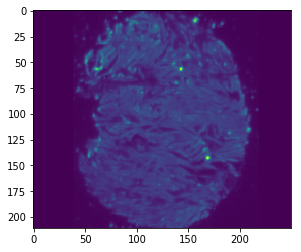

In [79]:
plt.imshow(tst.read_band(350))

In [ ]:
# Creating individual datacube files

In [ ]:
file = r"E:\Breast_Cancer_US_dataset\br1003-br2085b\br1003-br2085b"
header = r"E:\Breast_Cancer_US_dataset\br1003-br2085b\br1003-br2085b.hdr"

img = envi.open(header, file)

In [ ]:
example = img.read_subregion([0, 3400], [0, 3200])

In [ ]:
example.shape

In [ ]:
plt.imshow(example[:,:,451])

In [ ]:
example[100,100, 45].dtype

In [ ]:
envi.save_image(r"C:\Users\Conor\Documents\Breast_Tissue_Labels\1003\TMA_datacube_1003.hdr"
                , example
                , metadata = {"Name": "test", "Wavelengths": img.metadata["wavelength"]}
                , force = True)

In [ ]:
example.shape

In [ ]:
img.metadata["wavelength"]